<a href="https://colab.research.google.com/github/gayathrisarvani861/tsf-grip-task2-unsupervised-ML/blob/main/GRIPTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TSF GRIP: The Sparks Foundation**- *Data Science and Business Analytics Internship*
# **TASK 2- PREDICTION USING UNSUPERVISED MACHINE LEARNING**
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

● Use R or Python or perform this task

*Author: P.Gayathri Sarvani*

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
#reading the data
df=pd.read_csv('Iris.csv')

**EXPLORING THE DATA**

In [4]:
#displaying the first five rows using the head() function.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#displaying the last five rows using the tail() function.
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
#getting to know the shape of the dataframe
df.shape
#the result indicates that there are 150 rows and 6 columns

(150, 6)

In [7]:
#dtypes function is used to know the datatype of each column
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
df.drop('Id', axis=1, inplace=True)
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
#we use info() method to print a concise summary of a DataFrame.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#from the result above, it is quite evident that there are no null values, however to check the null values in a dataframe, we use:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
#describe() method is used to generate descriptive statistics.
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
#to remove duplicate data from the dataframe
duplicatedata=df.duplicated()
print(duplicatedata.sum())
df[duplicatedata]
#the result indicates that our dataframe does contain duplicate values.

3


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [13]:
df.drop_duplicates(inplace=True)  

In [14]:
duplicatedata=df.duplicated()
print(duplicatedata.sum())
df[duplicatedata]

0


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [15]:
df.shape

(147, 5)

In [16]:
df.count()
#to count how many rows are there in each column

SepalLengthCm    147
SepalWidthCm     147
PetalLengthCm    147
PetalWidthCm     147
Species          147
dtype: int64

**VISUALIZING THE DATA**

<function matplotlib.pyplot.show>

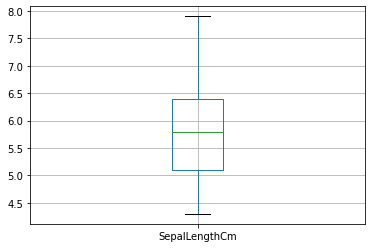

In [17]:
#OUTLIERS

#An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It’s often a good idea to detect and remove the outliers.
#Often outliers can be seen with visualizations using a box plot.

df.boxplot(column='SepalLengthCm')
plt.show

<function matplotlib.pyplot.show>

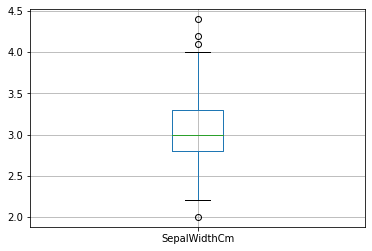

In [18]:
df.boxplot(column='SepalWidthCm')
plt.show

<function matplotlib.pyplot.show>

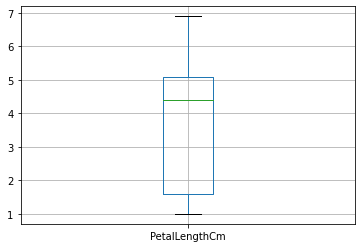

In [19]:
df.boxplot(column='PetalLengthCm')
plt.show

<function matplotlib.pyplot.show>

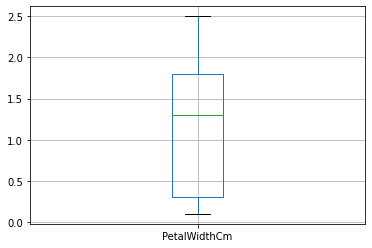

In [20]:
df.boxplot(column='PetalWidthCm')
plt.show

Looking at the box plot, it seems that the variable SepalWidthCm have outlier present in the variable. These outliers value needs to be teated and there are several ways of treating them:

Drop the outlier value Replace the outlier value using the IQR

In [21]:
def remove_outliners(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  l_range= Q1-(1.5*IQR)
  u_range= Q3+(1.5*IQR)
  return l_range,u_range

In [22]:
x,y=remove_outliners(df['SepalWidthCm'])
df['SepalWidthCm']=np.where(df['SepalWidthCm']>y, y, df['SepalWidthCm'])
df['SepalWidthCm']=np.where(df['SepalWidthCm']<x, x, df['SepalWidthCm'])

<function matplotlib.pyplot.show>

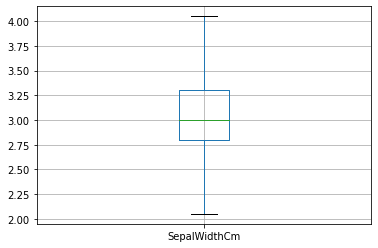

In [23]:
df.boxplot(column='SepalWidthCm')
plt.show

In [24]:
df.shape

(147, 5)

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


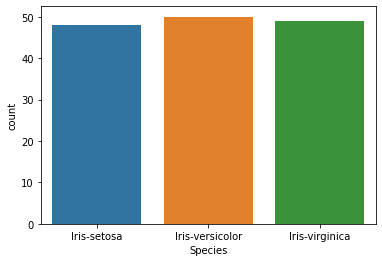

In [25]:
print(df.Species.value_counts())
sns.countplot(df.Species);

In [26]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110155,0.871305,0.817058
SepalWidthCm,-0.110155,1.000000,-0.420140,-0.355139
PetalLengthCm,0.871305,-0.420140,1.000000,0.961883
PetalWidthCm,0.817058,-0.355139,0.961883,1.000000


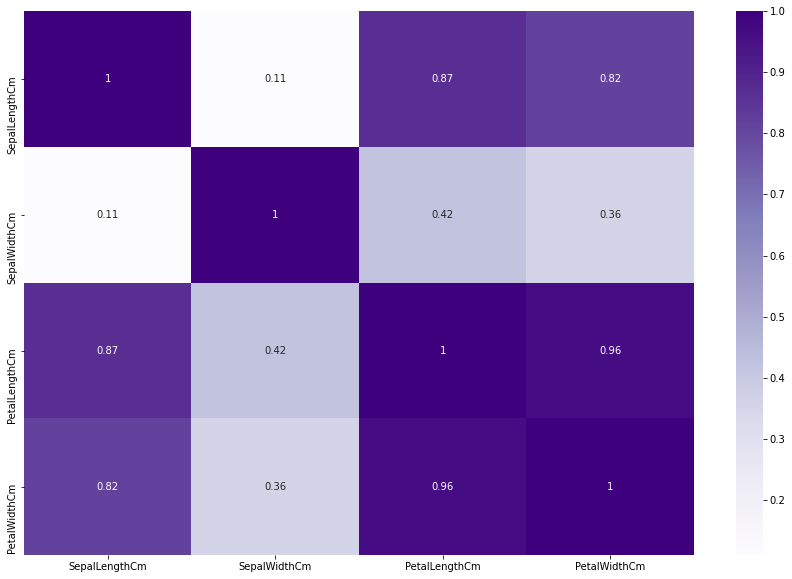

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap='Purples', annot=True);

**K-MEANS CLUSTERING ALOGORITHM**

In [28]:
from sklearn.cluster import KMeans

In [29]:
#dividing the data
X= df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
Y= df['Species'].values

In [30]:
wcss=[]

In [31]:
for i in range(1,10):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

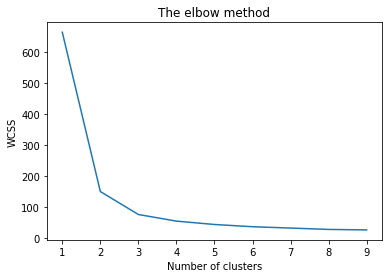

In [32]:
#plotting the graph
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [33]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans_1 = KMeans(n_clusters = 3)
kmeans_1.fit(X)
print(kmeans_1.cluster_centers_)
predclusters=kmeans_1.fit_predict(X)
print(predclusters)

[[5.01041667 3.41979167 1.4625     0.25      ]
 [5.90327869 2.75       4.38196721 1.42622951]
 [6.85       3.07368421 5.74210526 2.07105263]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2 2 2
 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0]


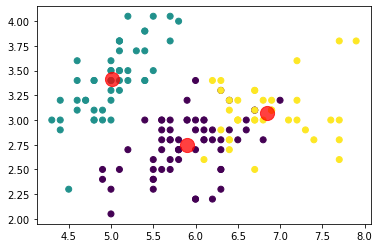

In [34]:
#Clustering Visualization

plt.scatter(X[:,0],X[:,1],c=predclusters,cmap='viridis')
centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75);
plt.show()

In [35]:
df['Species_encoded'] = df['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [36]:
kmeans_1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [37]:
df['cluster'] = kmeans_1.labels_
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [38]:
display(df['cluster'].value_counts(), df['Species'].value_counts())

0    61
1    48
2    38
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64